## DOWNLOADING REQUIRED LIBRARIES

In [5]:
!pip install fredapi > /dev/null

In [3]:
!pip install python-dotenv

### IMPORTING IMPORTANT LIBRARIES & API KEY

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

# Importing dotenv for environment variables
from dotenv import load_dotenv
import os
from fredapi import Fred
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Load environment variables
load_dotenv()

# Retrieve API key from environment variables
api_key = os.getenv('API_KEY')
if api_key is None:
    print("API Key not found in the .env file.")
else:
    print("API Key loaded successfully.")


API Key loaded successfully.


### Creating a Fred Object

In [5]:
fred = Fred(api_key)

### Searching for Economic data

In [6]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [7]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-04-14,2024-04-14,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-04-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-12 09:09:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-04-14,2024-04-14,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-03-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-04-14,2024-04-14,S&P 500,2014-04-14,2024-04-12,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-04-12 19:10:59-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-04-14,2024-04-14,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-04-14,2024-04-14,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-04-11,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-12 09:09:15-05:00,82,This data represents the effective yield of th...


### Pull raw data & plot

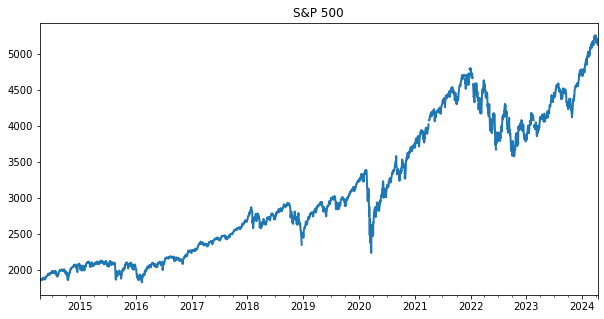

In [8]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

### Pull and join multiple data series

In [9]:
# Searching for data

# We are searching within the FRED database for data related to state-level unemployment rates.
# Within the searching process we are filtering out for data series that are reported on a monthly frequency
unemployment_df = fred.search("unemployment rate state", filter = ('frequency', 'Monthly'))

# Here, we are selecting data series that have been adjusted for seasonal variations and are expressed as percentages.
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

# This condition checks the 'title' of each data series contains the phrase "Unemployment Rate" it to ensure it strictly pertains to unemployment rates
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

In [10]:
# Initializing an empty list, which will be used to store all the individual data series for each unemployment rate
results = []

# The for loop here iterates over each index value in the "unemployment_df"
# Each index value ('i') is assumed to be a unique identifier to a specific data series related to unemployment rates
for i in unemployment_df.index:

    # Retrieves a time series data set using the series identifier 'i'.
    # The function returns the data as a pandas series where the index likey represents dataes and the value represent the unemployment rate

    r = fred.get_series(i)

    # Converting the series 'r' into a dataframe with a single column.
    # The 'name = 1' arguemtn sets the name if this column to the identifier 'i', helping to distinguish it in the final Dataframe

    r = r.to_frame(name = i)

    # Appending the dataframe to the results list
    # This process repeats for each series identifier in 'unemployment_df'

    results.append(r)

    # To pause the loop for 0.1 seconds during each iteration

    time.sleep(0.1)

# Combining all the Dataframes stored in the 'results' list into a single Dataframe.

unemployment_results = pd.concat(results, axis = 1)

#### The above code effectively compiles unemployment rate data from multiple sources into a single DataFrame, allowing for comparative analysis across different states or regions over time

In [11]:
# Initializing an empty list to the stores the names of the columns that we want to remove from the dataframe ("unemployment_results")
dropping_columns = []

# Here, the for loop iterates over each column name in the DataFrame. Each iteration variagle 'i' represents the name of a column in the DataFrame
for i in unemployment_results:
    # A condition to check if the length of the column name 'i' is greater than 4 characters
    if len(i) > 4:
        # If the above condition is met, the name of the column is added to the list 'dropping_columns'
        dropping_columns.append(i)
# To remove columns listed in 'dropping_columns'
# The 'axis = 1' argument tells the method that the operation should be performed along the axis of the columns (as opposed to rows, which would be 'axis=0')
unemployment_results = unemployment_results.drop(columns = dropping_columns, axis = 1)

In [12]:
# Creates a copy of the "unemployment_results" dataframe and stores in a new dataframe
unemployment_states = unemployment_results.copy()

# Removes dataframe that contains NaN values or missing data
unemployment_states = unemployment_states.dropna()

# Accessing the title which is then used to remove a specific substring in the title columns and simplying it with the name of each state and converting it to dictionary.
i_state = unemployment_df['title'].str.replace('Unemployment Rate in the State of ', '').to_dict()

# Iterates over each column and fetches the corresponding new name i.e. the state name from the 'i_stat' dictionary
unemployment_states.columns = [i_state[c] for c in unemployment_states.columns]

In [13]:
print(unemployment_df['title'].head())

series id
UNRATE                                          Unemployment Rate
LNS14000006         Unemployment Rate - Black or African American
CAUR                              Unemployment Rate in California
TXUR                                   Unemployment Rate in Texas
M0892AUSM156SNBR              Unemployment Rate for United States
Name: title, dtype: object


##### Plotting United States Unemployment Rate

In [14]:
px.line(unemployment_states)

### April 2020 Unemployment Rate Per State

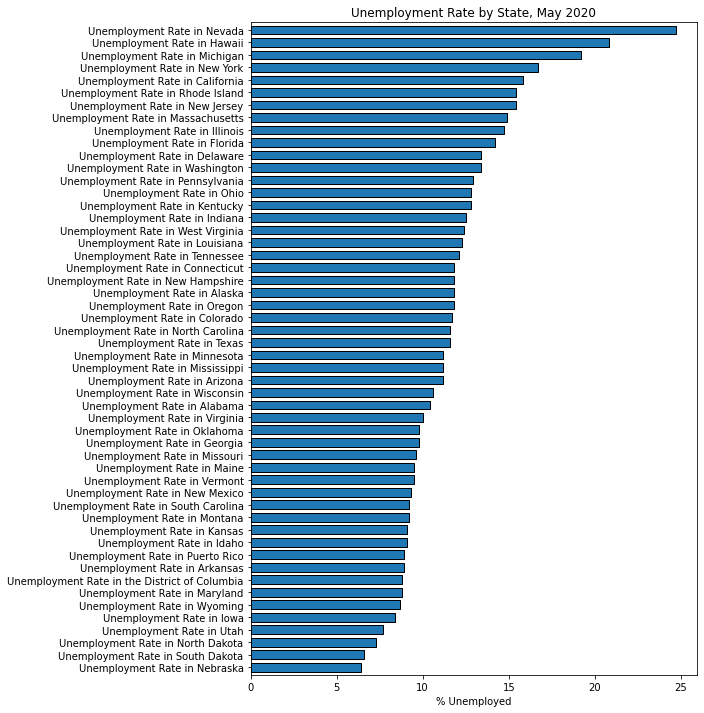

In [15]:
# Extracting rows from the dataframe wherever the date matches and is indexed by date and contains unemployment data
# we then transpose the dataframe so the states become rows, creating a horizantal chart
# Then sorting the transposed values by the unemployment rows, facilitating the creation of a horizantal bar chart
ax = unemployment_states.loc[unemployment_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
# Correct for assuming there's only one series of data
ax.legend().remove()
# Labeling the x-axis
ax.set_xlabel('% Unemployed')
plt.show()

#### Pull Participate Rate

#### The term "participate rate" in an economic context typically refers to the labor force participation rate. This rate is a measure of the proportion of a country's working-age population that engages actively in the labor market, either working or actively seeking work.

In [16]:
participating_df = fred.search('Participating Rate State', filter = ('frequency', 'Monthly'))
participating_df = participating_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')

In [18]:
participating_r_state = participating_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []

for i in participating_df.index:
    r = fred.get_series(i)
    r = r.to_frame(name=i)
    all_results.append(r)
    time.sleep(0.1)
p = pd.concat(all_results, axis = 1)
p.columns = [participating_r_state[c] for c in p.columns]

#### Plotting Unemployment vs Participation for each state

In [19]:
# Making sure that both 'unemployment_states' and 'p' have their indices set to datetime objects
unemployment_states.index = pd.to_datetime(unemployment_states.index)
p.index = pd.to_datetime(p.index)

In [20]:
# Create a mapping based on the output of print(p.columns)
column_mapping = {
    'Unemployment Rate in California': 'California',
    'Unemployment Rate in Nevada': 'Nevada',
    # Add other states as necessary
}

# Use the mapping to adjust your plotting code


In [21]:
print("Unemployment States Columns:", unemployment_states.columns)
print("Participation Rate Columns:", p.columns)


Unemployment States Columns: Index(['Unemployment Rate in California', 'Unemployment Rate in Texas',
       'Unemployment Rate in New York', 'Unemployment Rate in Florida',
       'Unemployment Rate in Pennsylvania', 'Unemployment Rate in Ohio',
       'Unemployment Rate in Michigan', 'Unemployment Rate in Alabama',
       'Unemployment Rate in Massachusetts',
       'Unemployment Rate in North Carolina', 'Unemployment Rate in Illinois',
       'Unemployment Rate in New Jersey', 'Unemployment Rate in Georgia',
       'Unemployment Rate in Colorado', 'Unemployment Rate in Arizona',
       'Unemployment Rate in Wisconsin', 'Unemployment Rate in Virginia',
       'Unemployment Rate in Kentucky', 'Unemployment Rate in South Carolina',
       'Unemployment Rate in New Mexico', 'Unemployment Rate in Minnesota',
       'Unemployment Rate in Tennessee', 'Unemployment Rate in Washington',
       'Unemployment Rate in Maryland', 'Unemployment Rate in Oregon',
       'Unemployment Rate in West Vi

In [22]:
# Renaming columns directly if needed
unemployment_states.columns = unemployment_states.columns.str.replace('the District of Columbia', 'District of Columbia')
p.columns = p.columns.str.replace('the District of Columbia', 'District of Columbia')

# Optionally, convert all names to a standard format, here just using the state names as an example
unemployment_states.columns = [col.split(' in ')[-1] for col in unemployment_states.columns]
p.columns = [col.split(' in ')[-1] for col in p.columns]

# Print columns to verify correct renaming
print("Adjusted Unemployment States Columns:", unemployment_states.columns)
print("Adjusted Participation Rate Columns:", p.columns)


Adjusted Unemployment States Columns: Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')
Adjusted Participation Rate Columns: Index(['Labor Force Participation Rate',
       'Labor Force Participation Rate - 25-54 Yrs.',
       'Labor Force Participation Rate - Women',
       'Labor Force Partici

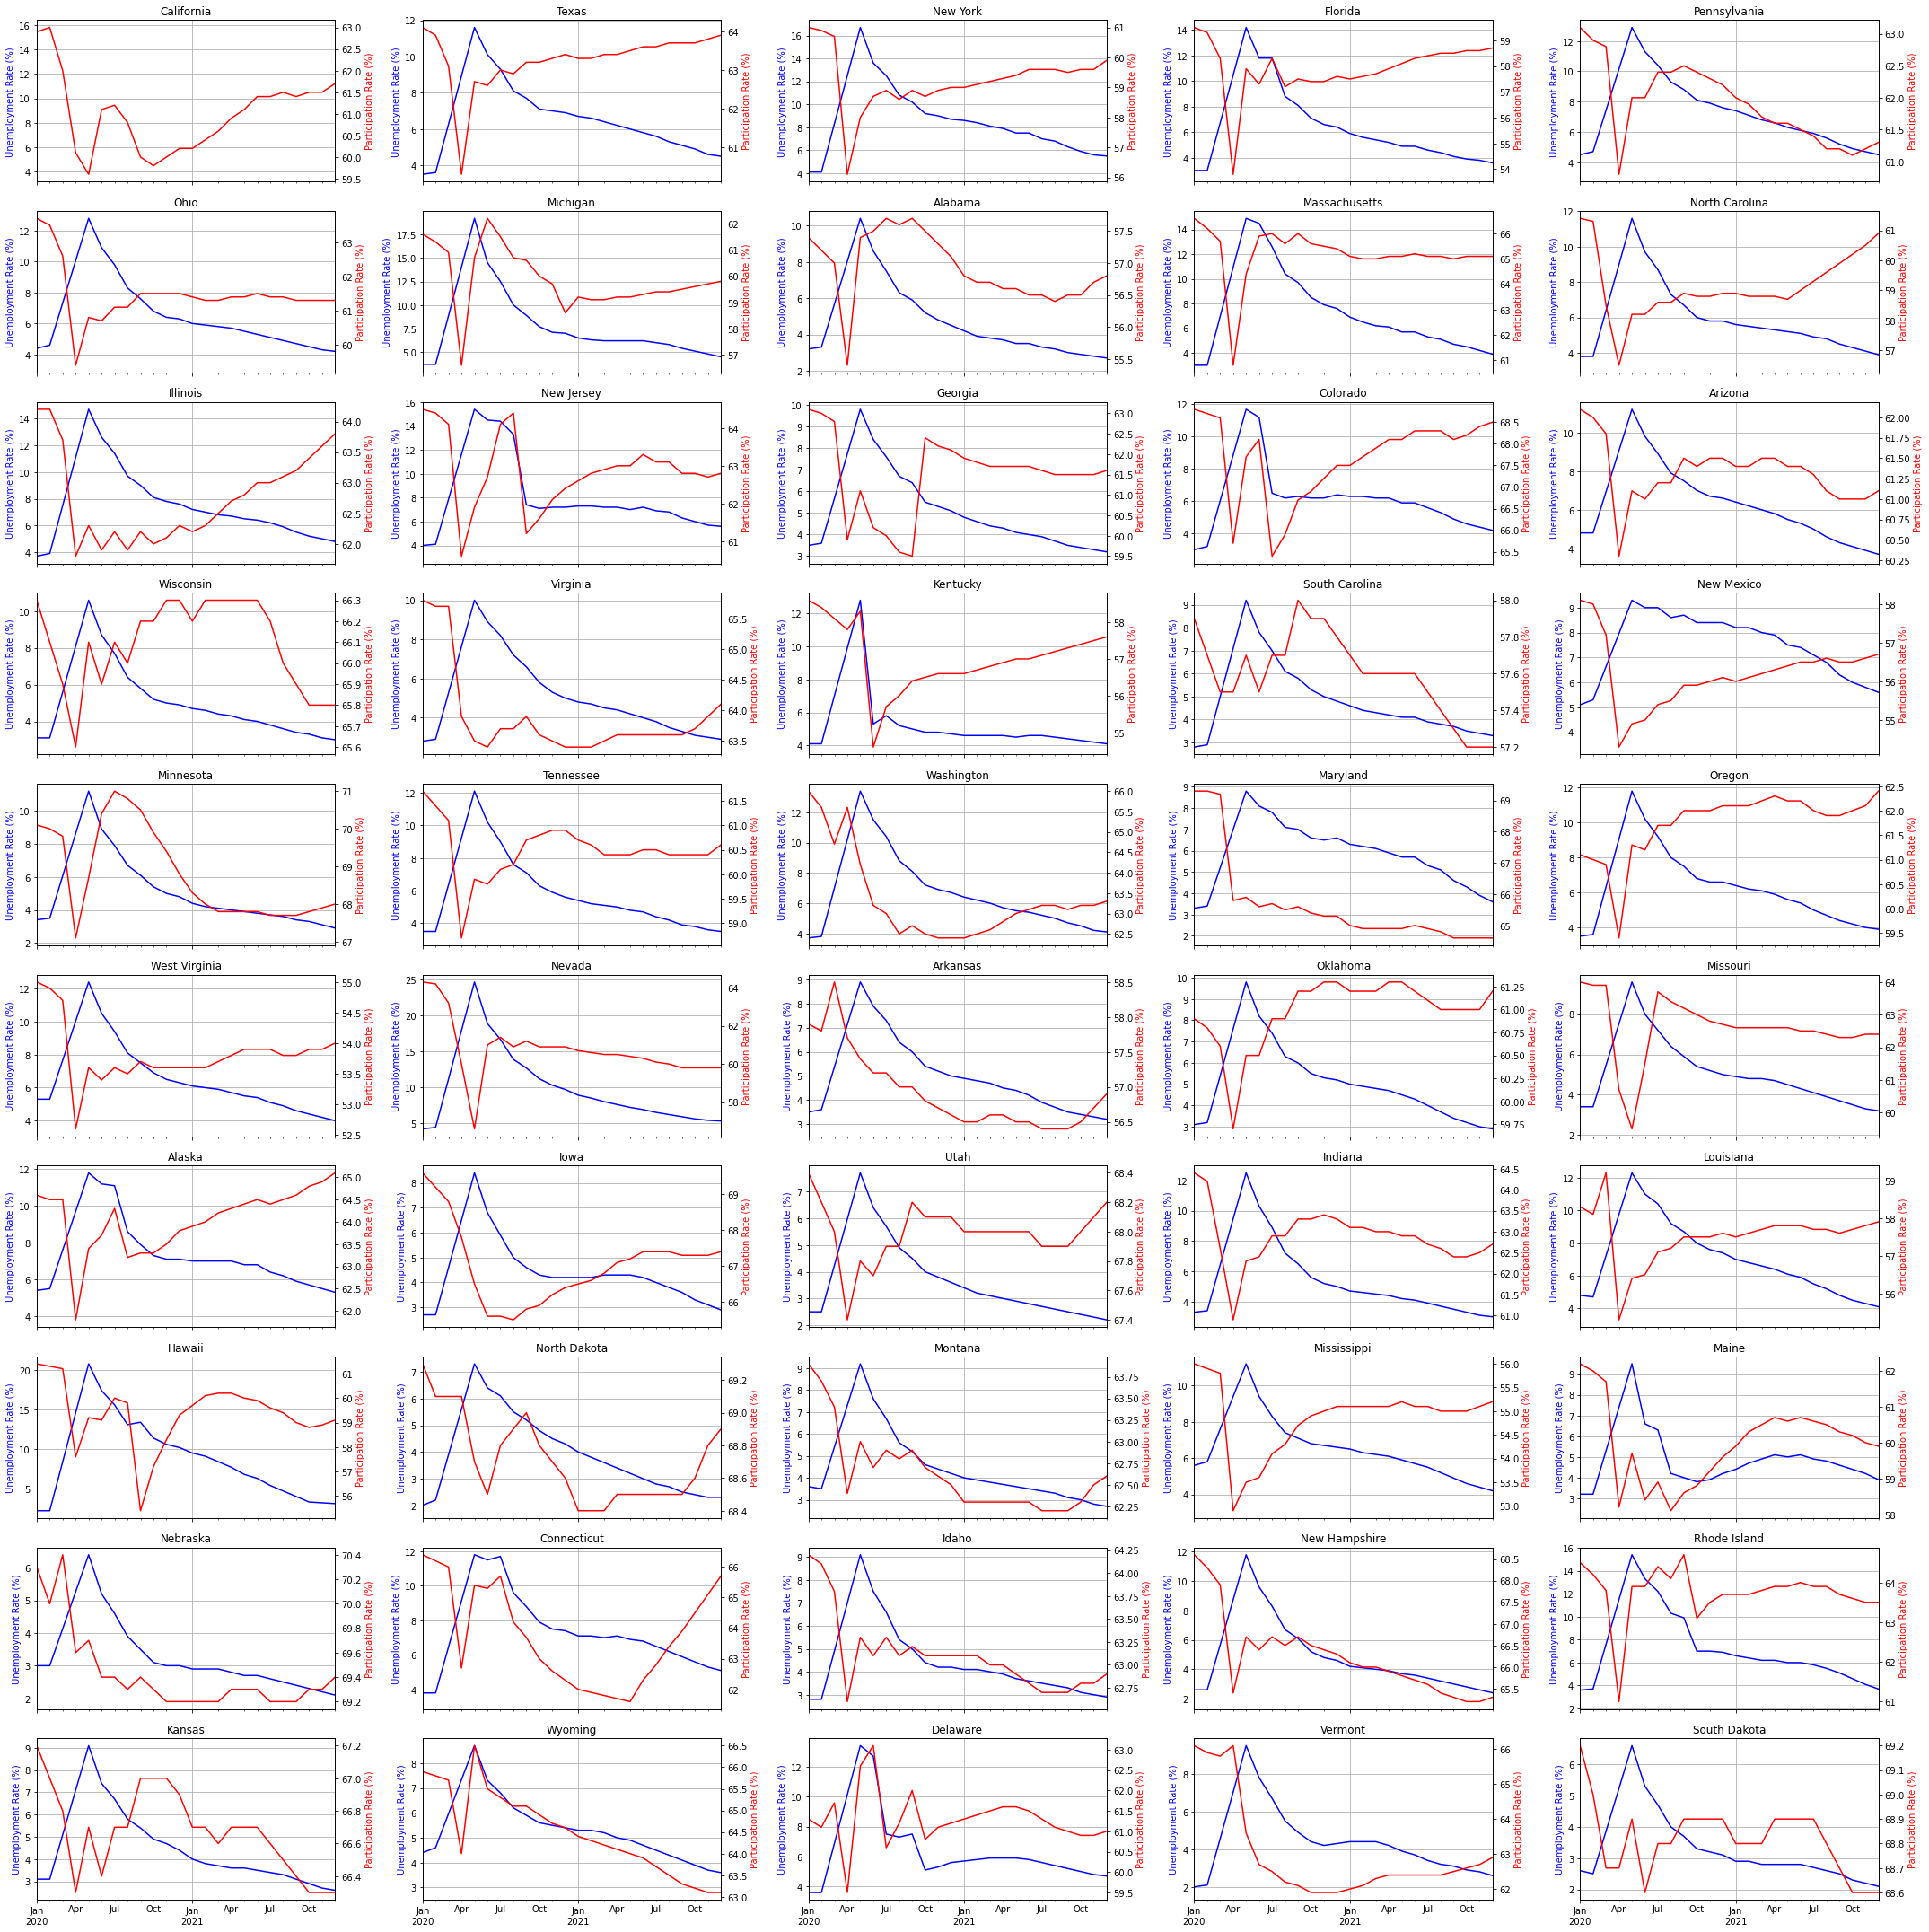

In [44]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_states.columns:
    if state in ['District of Columbia', 'Puerto Rico']:  # Skip if necessary
        continue

    ax = axs[i]
    ax2 = ax.twinx()

    try:
        # Plotting Unemployment Rate
        unemployment_states.query('index >= "2020" and index < "2024"')[state].plot(ax=ax, label='Unemployment Rate', color='blue')
        ax.set_ylabel('Unemployment Rate (%)', color='blue')

        # Plotting Participation Rate
        p.query('index >= "2020" and index < "2022"')[state].plot(ax=ax2, label='Participation Rate', color='red')
        ax2.set_ylabel('Participation Rate (%)', color='red')

        ax.set_title(state)
        ax.grid(True)
        
        i += 1  # Increment the subplot index
    except KeyError as e:
        print(f"Failed to plot {state}: {e}")

plt.tight_layout()
plt.show()

